In [ ]:
import cv2 as cv
from ultralytics import YOLO
import os
import numpy as np

# img = cv.imread('test_pic.png')
img = cv.imread('test_many_obj.jpg')

model_path = os.path.join('.', 'runs', 'obb', 'train2', 'weights', 'best.pt')

# Load a model
model = YOLO(model_path)  # load a custom model

results = model(img,conf=0.25)[0]

detections = results.obb.xywhr
class_ids = results.obb.cls

# Iterate over each detection
i=0
for det in detections:
    det = det.cpu().numpy().tolist()
    x_center, y_center, width, height, rotation = det
    class_id = class_ids[i].cpu().item() # The class ID is typically the 6th value
    class_name = results.names[class_id] # Get the class name using the class ID

    # Calculate the coordinates of the top-left corner
    x_top_left = int(x_center - (width / 2))
    y_top_left = int(y_center - (height / 2))

    rotation = np.rad2deg(rotation)
    # Draw the rotated rectangle
    # rect = ((x_center, y_center), (width, height), rotation)
    rect = ((float(x_center), float(y_center)), (float(width), float(height)), float(rotation))
    box = cv.boxPoints(rect)
    box = np.int0(box)
    cv.drawContours(img, [box], 0, (0, 255, 0), 2)

    # Draw the class name and rotation angle
    label = f"{class_name} {rotation:.2f}°"
    cv.putText(img, label, (x_top_left, y_top_left - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Draw the coordinates
    coordinates_label = f"({x_center:.2f}, {y_center:.2f})"
    cv.putText(img, coordinates_label, (x_top_left, y_top_left - 25), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    i+=1

cv.imwrite('infer.jpg',img)
# Display the image
# cv.imshow('Detections', img)
# cv.waitKey(0)
# cv.destroyAllWindows()


In [ ]:


from ultralytics import YOLO
import cv2
import os



video_path = 'test.mp4'
video_path_out = '{}_out.mp4'.format(video_path)

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

model_path = os.path.join('.', 'runs', 'obb', 'train2', 'weights', 'best.pt')

# Load a model
model = YOLO(model_path)  # load a custom model

threshold = 0.5

while ret:

    results = model(frame)[0]
    detections = results.obb.xywhr
    class_ids = results.obb.cls

    # Iterate over each detection
    i=0
    for det in detections:
        det = det.cpu().numpy().tolist()
        x_center, y_center, width, height, rotation = det
        class_id = class_ids[i].cpu().item() # The class ID is typically the 6th value
        class_name = results.names[class_id] # Get the class name using the class ID

        # Calculate the coordinates of the top-left corner
        x_top_left = int(x_center - (width / 2))
        y_top_left = int(y_center - (height / 2))


        if class_name == 'bolt':
            colour = (0,255,0)
        else:
            colour = (0,0,255)
        rotation = np.rad2deg(rotation)
        # Draw the rotated rectangle
        # rect = ((x_center, y_center), (width, height), rotation)
        rect = ((float(x_center), float(y_center)), (float(width), float(height)), float(rotation))
        box = cv.boxPoints(rect)
        box = np.int0(box)
        cv.drawContours(frame, [box], 0, colour, 2)

        # Draw the class name and rotation angle
        label = f"class: {class_name}, angle: {rotation:.2f}"
        cv.putText(frame, label, (x_top_left, y_top_left - 10), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        # Draw the coordinates
        coordinates_label = f"({x_center:.2f}, {y_center:.2f})"
        cv.putText(frame, coordinates_label, (x_top_left, y_top_left - 25), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        i+=1
    

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()

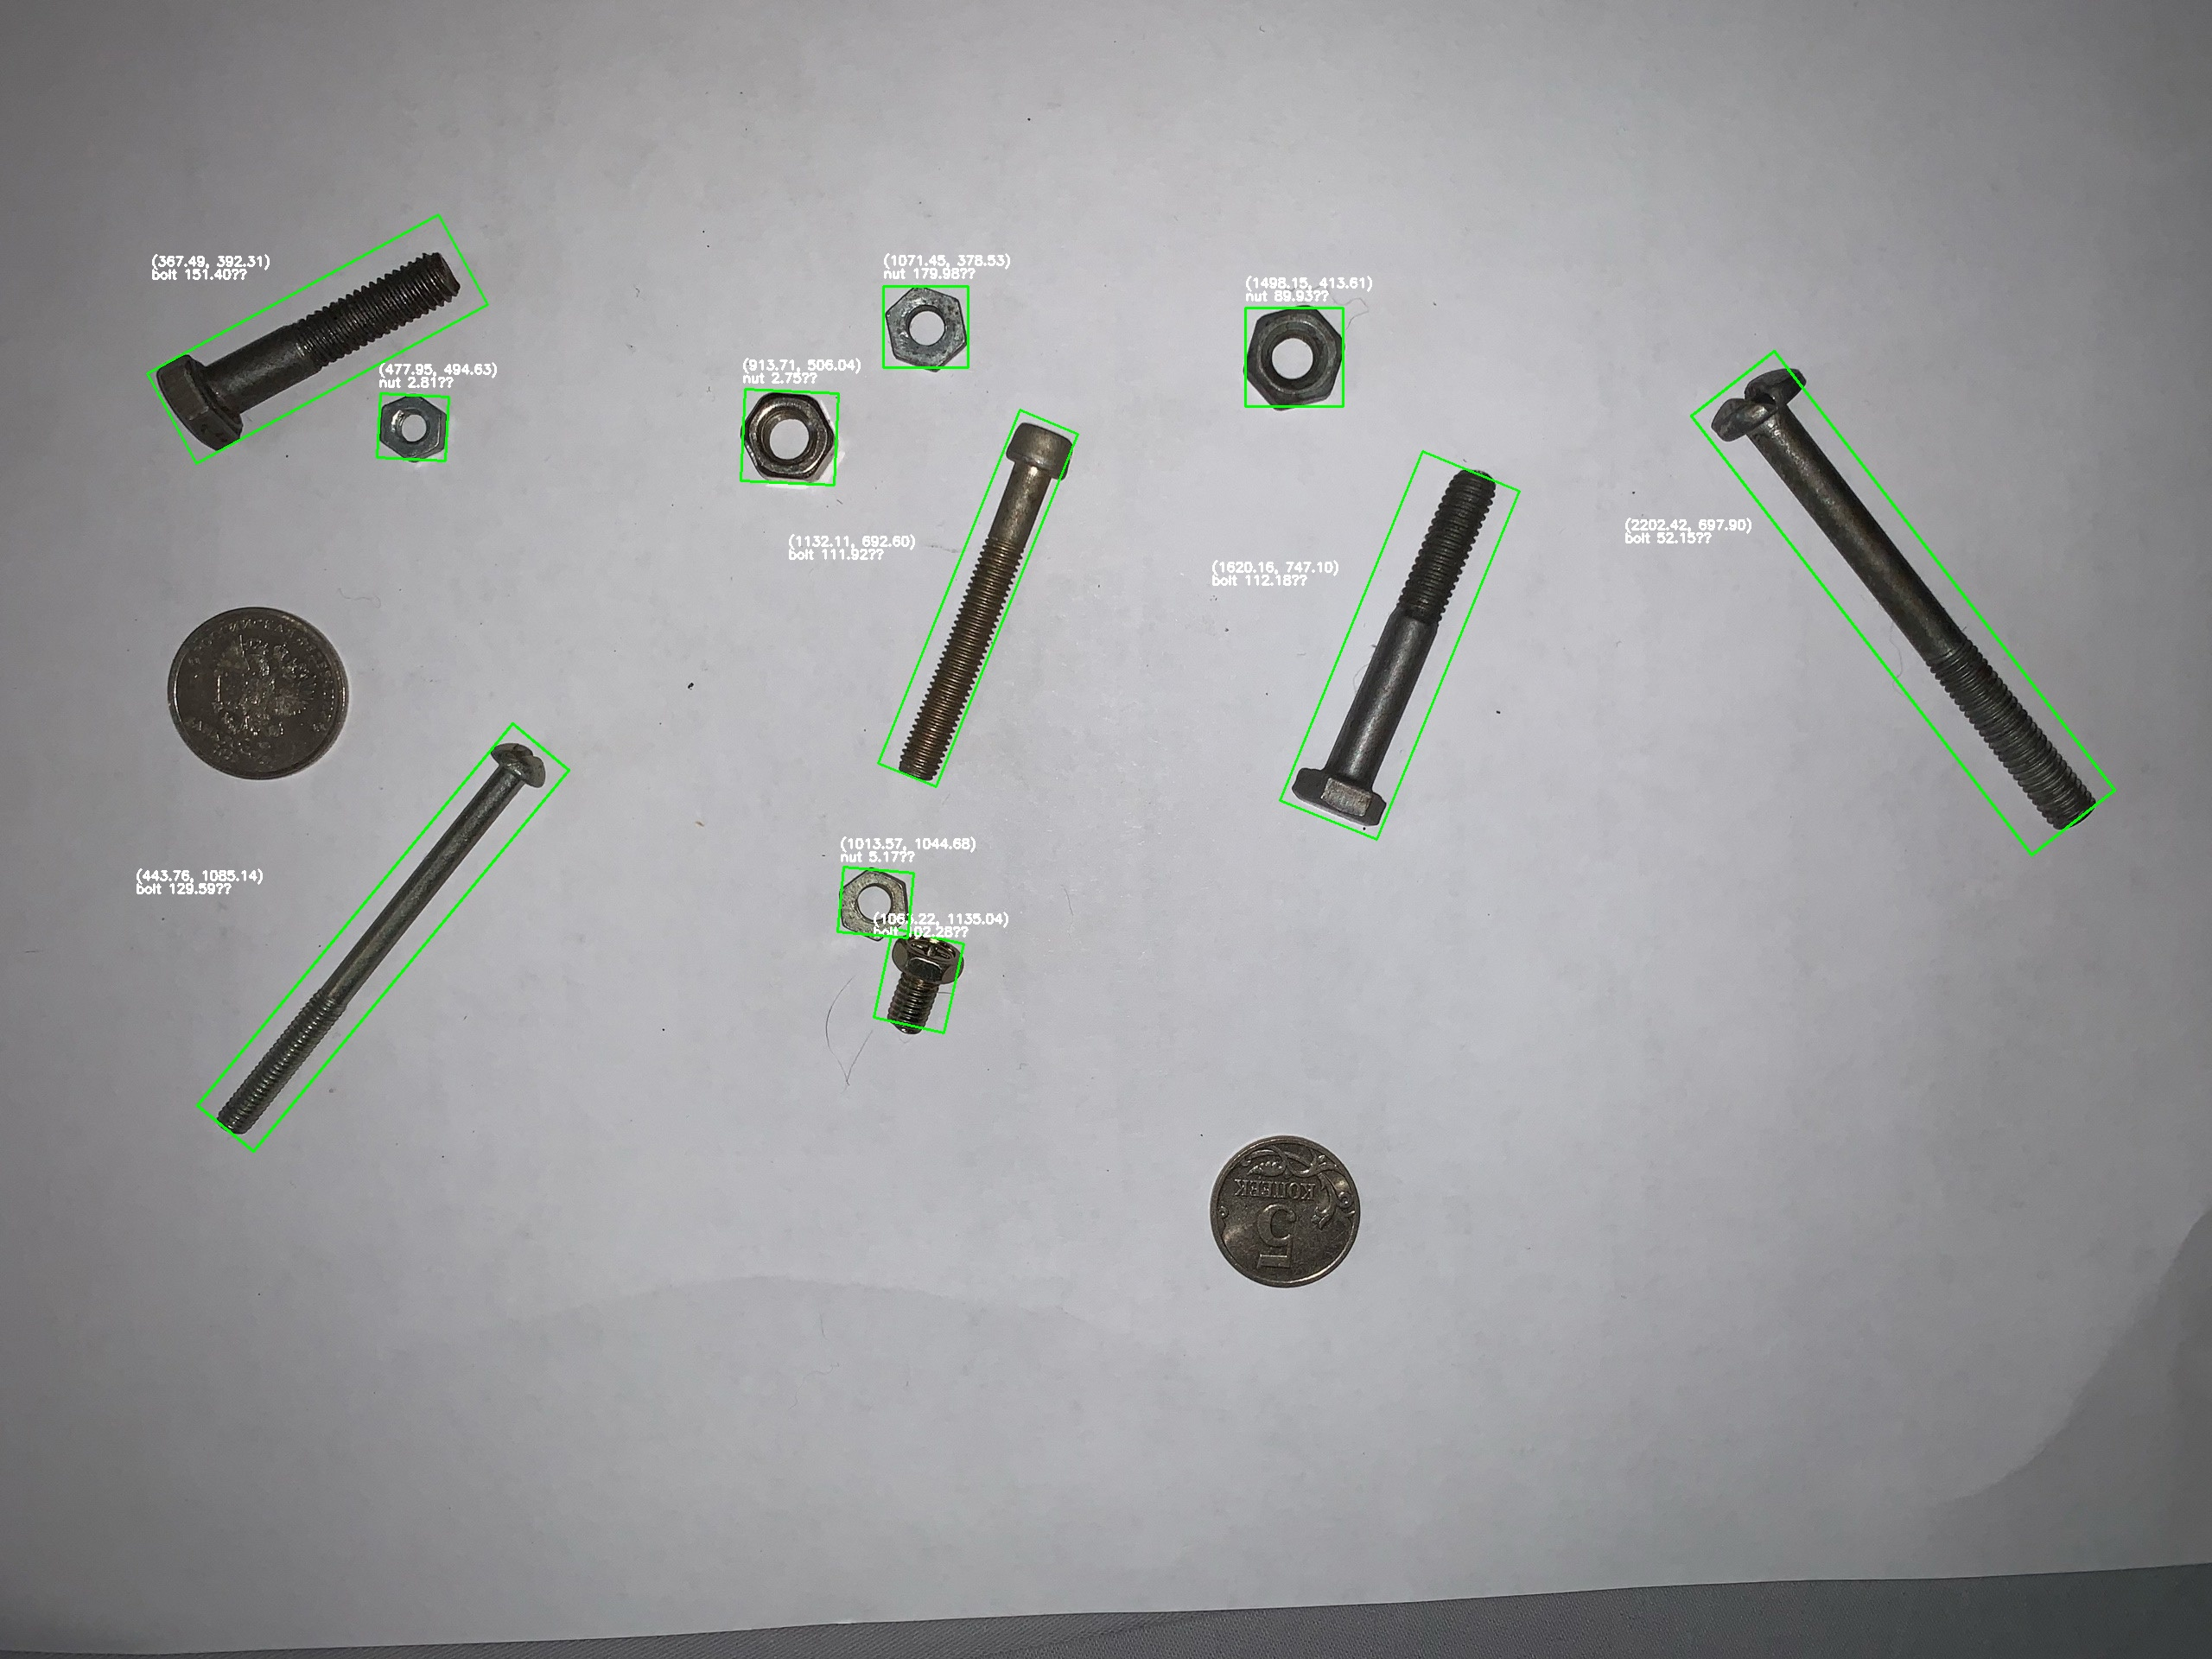

In [1]:
from PIL import Image
test_img = Image.open('infer.jpg')

display(test_img)